In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from bs4 import BeautifulSoup
import requests

In [ ]:
url = "https://www.usinflationcalculator.com/inflation/consumer-price-index-and-annual-percent-changes-from-1913-to-2008/"

r = requests.get(url)
data = r.text
soup = BeautifulSoup(data, "html.parser")

table = soup.find('table')
rows = table.tbody.findAll("tr");

years = []
cpis = []

for row in rows:
   year = row.findAll('td')[0].get_text()
   if year.isdigit() and int(year) < 2017:
     years.append(int(year))
     cpis.append(float(row.findAll('td')[13].get_text()))

cpi_table = pd.DataFrame({"year":years, "avg_annual_cpi":cpis})

In [ ]:
def get_real_value(nominal_aut, old_cpi, new_cpi):
   real_value = (nominal_aut * new_cpi)/old_cpi
   return real_value

In [ ]:
CPI_2016 = float(cpi_table[cpi_table['year']==2016]['avg_annual_cpi'])

In [ ]:
data = pd.read_csv("Dataset1.csv")

In [ ]:
data.head(2)

,color,Director_Name,num_Critic_for_reviews,duration,director_Facebook_likes,actor_3_Facebook_likes,actor_2_name,Actor_1_Facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes;
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000;
1,Colour,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0;


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   color                       5025 non-null   object 
 1   Director_Name               4872 non-null   object 
 2   num_Critic_for_reviews      4927 non-null   float64
 3   duration                    4959 non-null   float64
 4   director_Facebook_likes     4872 non-null   float64
 5   actor_3_Facebook_likes      4953 non-null   float64
 6   actor_2_name                4963 non-null   object 
 7   Actor_1_Facebook_likes      4968 non-null   float64
 8   gross                       4104 non-null   float64
 9   genres                      4974 non-null   object 
 10  actor_1_name                4968 non-null   object 
 11  movie_Title                 4974 non-null   object 
 12  num_voted_users             4974 non-null   float64
 13   cast_total_facebook_likes  4974 

In [ ]:
data.rename(columns={" cast_total_facebook_likes": "cast_total_facebook_likes",
                     "movie_facebook_likes;": "movie_facebook_likes",
                     "Actor_1_Facebook_likes": "actor_1_Facebook_likes"}, inplace=True)

In [ ]:
data.isna().sum()

color                         18
Director_Name                171
num_Critic_for_reviews       116
duration                      84
director_Facebook_likes      171
actor_3_Facebook_likes        90
actor_2_name                  80
actor_1_Facebook_likes        75
gross                        939
genres                        69
actor_1_name                  75
movie_Title                   69
num_voted_users               69
cast_total_facebook_likes     69
actor_3_name                  90
facenumber_in_poster          82
plot_keywords                216
movie_imdb_link               69
num_user_for_reviews          87
language                      80
country                       72
content_rating               366
budget                       549
title_year                   174
actor_2_facebook_likes        80
imdb_score                    69
aspect_ratio                 389
movie_facebook_likes          69
dtype: int64

In [ ]:
len(data.columns)

28

In [ ]:
data.duplicated().sum()

45

In [ ]:
# плохая идея, пусть останется до лучших времен. Не запускать!
# list_col = data.columns
# fig = plt.figure(figsize=(25, 15))
# cols = 4
# rows = 7

# for i, col in enumerate(list_col):
#     ax = fig.add_subplot(rows, cols, i+1)
#     ax.set_title(col)
#     if data[col].dtype == object:
#         data[col].value_counts().plot(kind="bar", ax=ax)
#     else:
#         data[col].hist(ax=ax)
#         plt.xticks(rotation='vertical')

# plt.subplots_adjust(hspace=0.7, wspace=0.2)
# plt.show()

### Чистка данных

In [ ]:
data = data.drop_duplicates().reset_index(drop=True)

In [ ]:
data['movie_facebook_likes'] = data['movie_facebook_likes'].apply(lambda x: float(x[:-1]) if isinstance(x, str) and x.endswith(';') else np.nan)
data['plot_keywords'] = data['plot_keywords'].apply(lambda x: x.split("|") if isinstance(x, str) else "Unknown")
data['genres'] = data['genres'].apply(lambda x: x.split("|") if isinstance(x, str) else "Unknown")

In [ ]:
filling_columns_with_median_value = ['movie_facebook_likes',
                                    'aspect_ratio',
                                    'imdb_score',
                                    'actor_2_facebook_likes',
                                    'title_year',
                                    'budget',
                                    'num_user_for_reviews',
                                    'facenumber_in_poster',
                                    'cast_total_facebook_likes',
                                    'num_voted_users',
                                    'gross',
                                    'actor_1_Facebook_likes',
                                    'actor_3_Facebook_likes',
                                    'director_Facebook_likes',
                                    'duration',
                                    'num_Critic_for_reviews'
                                    ]

filling_columns_with_the_word_unknown = ['content_rating',
                                         'country',
                                         'language',
                                         'movie_imdb_link',
                                         'actor_3_name',
                                         'movie_Title',
                                         'actor_1_name',
                                         'actor_2_name',
                                         'Director_Name',
                                         'color'
                                        ]

In [ ]:
for row in filling_columns_with_the_word_unknown:
    data[row] = data[row].fillna('unknown')

for row in filling_columns_with_median_value:
    data[row] = data[row].fillna(data[row].median())

In [ ]:
data.head(3)

,color,Director_Name,num_Critic_for_reviews,duration,director_Facebook_likes,actor_3_Facebook_likes,actor_2_name,actor_1_Facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,"[Action, Adventure, Fantasy, Sci-Fi]",...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,Colour,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,"[Action, Adventure, Fantasy]",...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
2,Colour,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,"[Action, Adventure, Thriller]",...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0


In [ ]:
float_columns = data.select_dtypes(include='float64').columns.tolist()
exclude_columns = ['aspect_ratio', 'imdb_score']
from_float_to_int = [col for col in float_columns if col not in exclude_columns]

for col in from_float_to_int:
    data[col] = data[col].astype('int')

In [ ]:
real_domestic_gross = []
real_budget_values = []
profits = []
roi_vals = []

for index, row in data.iterrows():
   gross = row['gross']
   budget = row['budget']
   year = row['title_year']
   cpi = float(cpi_table[cpi_table['year'] == year]['avg_annual_cpi'])

   real_gross = get_real_value(gross, cpi, CPI_2016)
   real_budget = get_real_value(budget, cpi, CPI_2016)
   real_domestic_gross.append(real_gross)
   real_budget_values.append(real_budget)

data['real_domestic_gross'] = real_domestic_gross
data['real_budget'] = real_budget_values

for index, row in data.iterrows():
   profit = row['real_domestic_gross'] - row['real_budget']
   budget = row['real_budget']
   num = profit - budget
   den = budget

   roi = (num/den) * 100

   profits.append(profit)
   roi_vals.append(roi)

data['profit'] = profits
data['roi'] = roi_vals

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      4998 non-null   object 
 1   Director_Name              4998 non-null   object 
 2   num_Critic_for_reviews     4998 non-null   int64  
 3   duration                   4998 non-null   int64  
 4   director_Facebook_likes    4998 non-null   int64  
 5   actor_3_Facebook_likes     4998 non-null   int64  
 6   actor_2_name               4998 non-null   object 
 7   actor_1_Facebook_likes     4998 non-null   int64  
 8   gross                      4998 non-null   int64  
 9   genres                     4998 non-null   object 
 10  actor_1_name               4998 non-null   object 
 11  movie_Title                4998 non-null   object 
 12  num_voted_users            4998 non-null   int64  
 13  cast_total_facebook_likes  4998 non-null   int64

In [ ]:
data.head(2)

,color,Director_Name,num_Critic_for_reviews,duration,director_Facebook_likes,actor_3_Facebook_likes,actor_2_name,actor_1_Facebook_likes,gross,genres,...,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,real_domestic_gross,real_budget,profit,roi
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,"[Action, Adventure, Fantasy, Sci-Fi]",...,237000000,2009,936,7.9,1.78,33000,8.507937e+08,2.651368e+08,5.856569e+08,120.888543
1,Colour,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,"[Action, Adventure, Fantasy]",...,300000000,2007,5000,7.1,2.35,0,3.582208e+08,3.473329e+08,1.088790e+07,-96.865283


In [ ]:
budget_by_year = data.groupby("title_year").agg({"real_budget": 'sum'}).reset_index().rename(columns={'title_year':'Year'});
fig = px.line(budget_by_year, x="Year", y="real_budget", title="Общий буджет фильмов по годам")
plt.figure(figsize=(10, 6))
fig.show()

<Figure size 1000x600 with 0 Axes>

График позволяет сделать вывод, что в 2006 году страны выделили больше всего бюджета для съемки фильмов. Это может быть интересным наблюдением, которое может указывать на значительные инвестиции в индустрию развлечений и кинематографии в этот период.  Давайте разберемся, какая страна больше всего инвестировала в кинематограф в 2006 году.

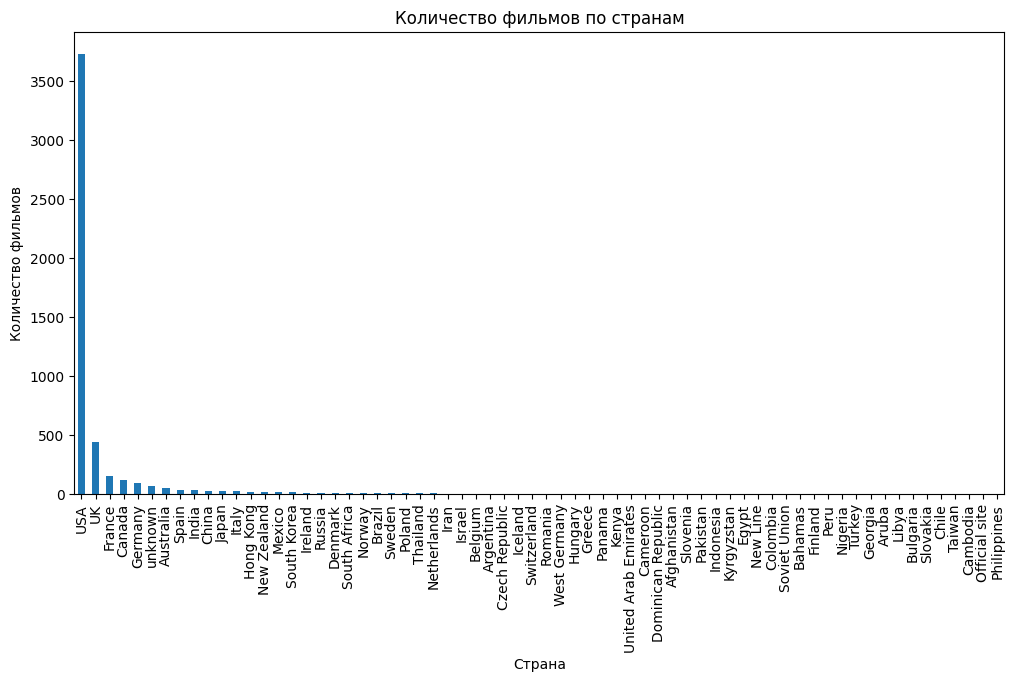

In [ ]:
country_counts = data['country'].value_counts()
country_counts.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Страна')
plt.ylabel('Количество фильмов')
plt.title('Количество фильмов по странам')
plt.xticks(rotation=90)
plt.show()

Если мы взглянем на графики, можно заметить, что большинство фильмов были сняты в Соединенных Штатах Америки. Это является интересным отражением доминирования американской кинематографии в мировой индустрии.

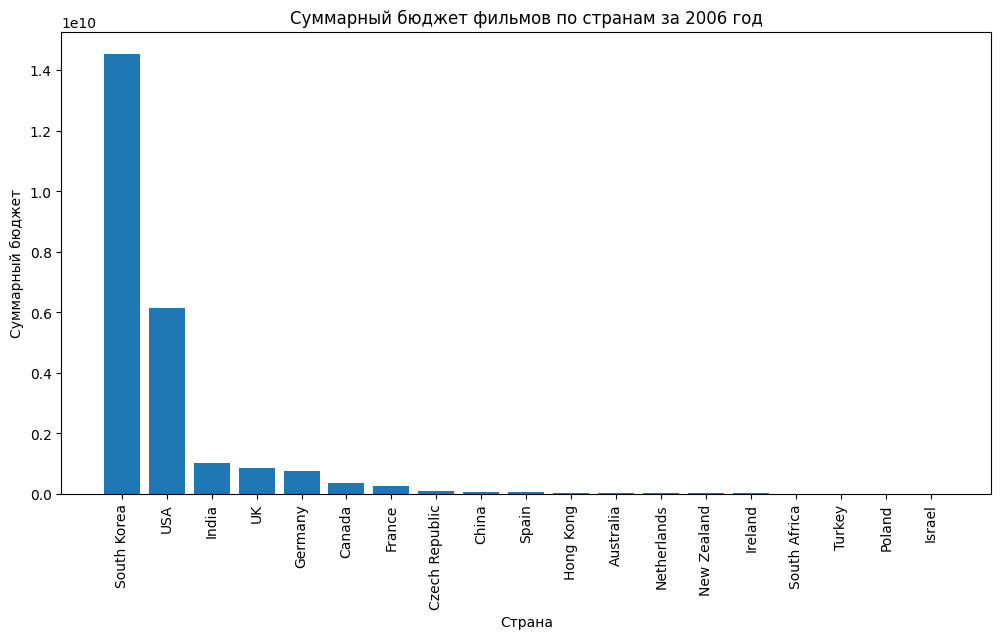

In [ ]:
country_budget = data.query("title_year == 2006").groupby(["country"]).agg({"real_budget":'sum'}).reset_index().sort_values(by = "real_budget", ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(country_budget['country'], country_budget['real_budget'])
plt.xlabel('Страна')
plt.ylabel('Суммарный бюджет')
plt.title('Суммарный бюджет фильмов по странам за 2006 год')
plt.xticks(rotation=90)
plt.show()

Поразительно, но в 2006 году Северная Корея оказалась на первом месте по объему инвестиций в кинематограф, опередив даже Соединенные Штаты. Этот факт может вызывать интерес и поднимать вопросы о том, что могло спровоцировать такое явление.

## Гипотеза 1: Возможно ли, что длительность фильма имеет прямую связь с его прибыльностью?

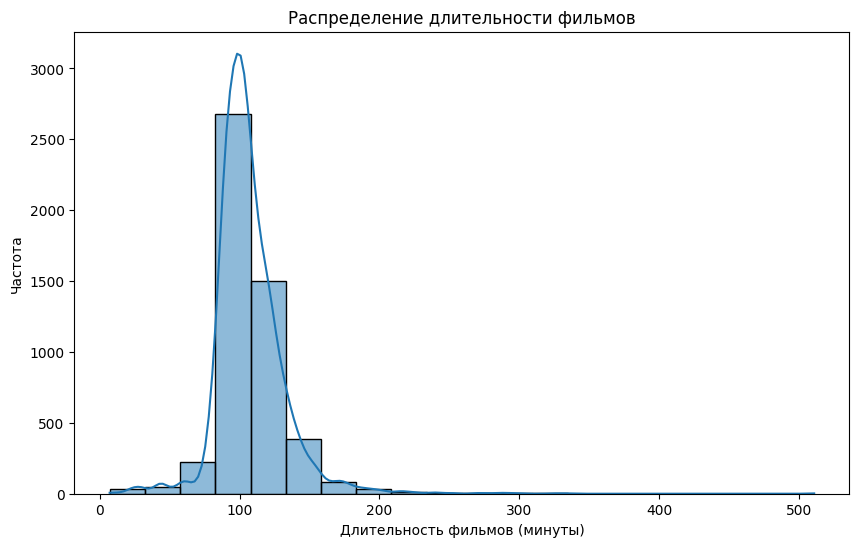

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='duration', bins=20, kde=True)
plt.xlabel('Длительность фильмов (минуты)')
plt.ylabel('Частота')
plt.title('Распределение длительности фильмов')
plt.show()

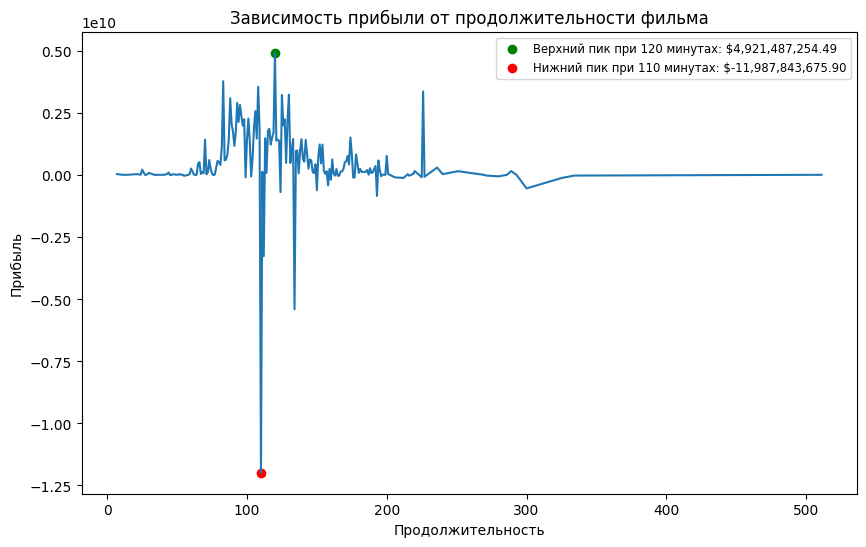

In [ ]:
profit_time = data.groupby("duration").agg({"profit":'sum'}).reset_index()
plt.figure(figsize=(10, 6))
plt.plot(profit_time['duration'], profit_time['profit'])
plt.xlabel('Продолжительность')
plt.ylabel('Прибыль')
plt.title('Зависимость прибыли от продолжительности фильма')

max_profit_index = profit_time['profit'].idxmax()
max_profit_duration = profit_time.loc[max_profit_index, 'duration']
max_profit = profit_time.loc[max_profit_index, 'profit']

min_profit_index = profit_time['profit'].idxmin()
min_profit_duration = profit_time.loc[min_profit_index, 'duration']
min_profit = profit_time.loc[min_profit_index, 'profit']

plt.scatter(max_profit_duration, max_profit, color='green', label=f'Верхний пик при {max_profit_duration} минутах: ${max_profit:,.2f}')
plt.scatter(min_profit_duration, min_profit, color='red', label=f'Нижний пик при {min_profit_duration} минутах: ${min_profit:,.2f}')

plt.legend(fontsize='small')
plt.show()

График показывает, что фильмы с продолжительностью в 120 минут имеют максимальную прибыль. Однако, когда продолжительность снижается до 110 минут, прибыль значительно снижается. Это может быть результатом разных факторов.

Возможно, фильмы продолжительностью 110 минут имеют какие-то особенности или выбросы, которые влияют на их прибыль. Также возможно, что для зрителей 110 минут может быть слишком коротким временем для получения полного удовольствия от фильма, и поэтому они не рекомендуют их другим.

Можно заметить, что фильмы продолжительностью более 120 минут имеют тенденцию к снижению прибыли. Это важное наблюдение может указывать на то, что зрителям становится скучно или неинтересно при длительном просмотре фильма

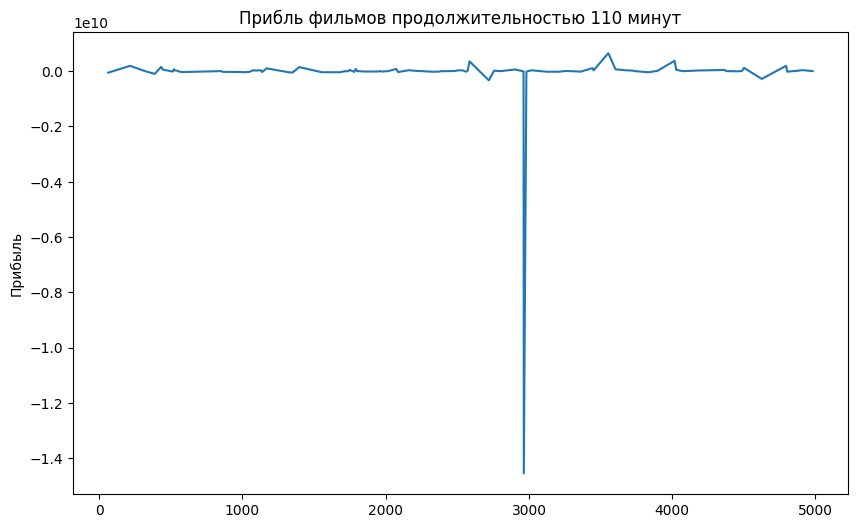

In [ ]:
duration_110 = data.query("duration == 110")
plt.figure(figsize=(10, 6));
plt.plot(duration_110['profit']);

plt.ylabel("Прибыль");
plt.title("Прибль фильмов продолжительностью 110 минут");

Как я и подозревал, мы столкнулись с выбросом, который искажает статистику для фильмов продолжительностью 110 минут. Давайте выясним, о каком фильме идет речь, чтобы понять, как он влияет на данные.

In [ ]:
bad_movie_index = duration_110['profit'].idxmin()
bad_movie_data = data.iloc[bad_movie_index]

In [ ]:
bad_movie_data

color                                                                    Color
Director_Name                                                     Joon-ho Bong
num_Critic_for_reviews                                                     363
duration                                                                   110
director_Facebook_likes                                                    584
actor_3_Facebook_likes                                                      74
actor_2_name                                                      Kang-ho Song
actor_1_Facebook_likes                                                     629
gross                                                                  2201412
genres                                         [Comedy, Drama, Horror, Sci-Fi]
actor_1_name                                                         Doona Bae
movie_Title                                                          The Host 
num_voted_users                                     

Оказалось, что этот фильм был снят в Корее в 2006 году, однако не получил заслуженного внимания со стороны зрителей.

Этот случай поднимает интересные вопросы о кинопроизводстве и инвестициях в индустрию развлечений. Как я заметил ранее, в 2006 году Северная Корея выделила значительные бюджетные ресурсы на съемку фильмов, и, возможно, этот фильм был одним из проектов, на который были возложены надежды. Однако коэффициент ROI в -199 свидетельствует о том, что этот фильм оказался крупным финансовым провалом.

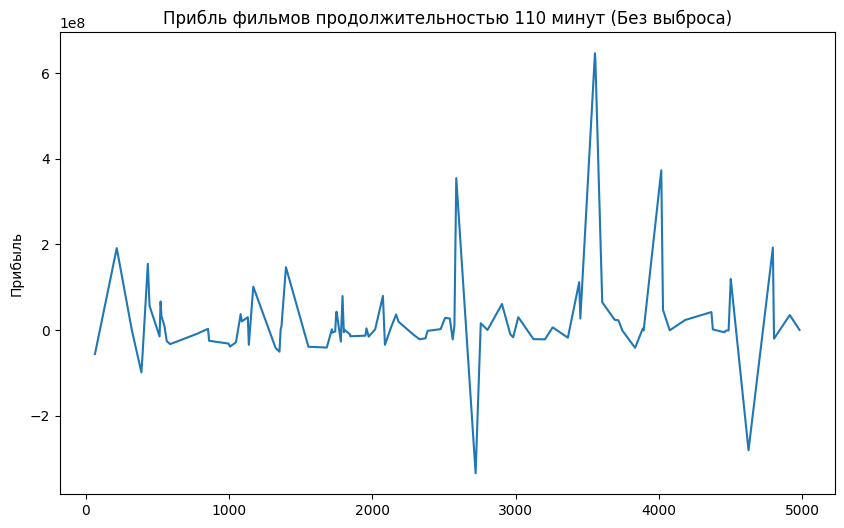

In [ ]:
duration_110_without_outlier = duration_110.drop(bad_movie_index)
plt.figure(figsize=(10, 6));
plt.plot(duration_110_without_outlier['profit']);

plt.ylabel("Прибыль");
plt.title("Прибль фильмов продолжительностью 110 минут (Без выброса)");

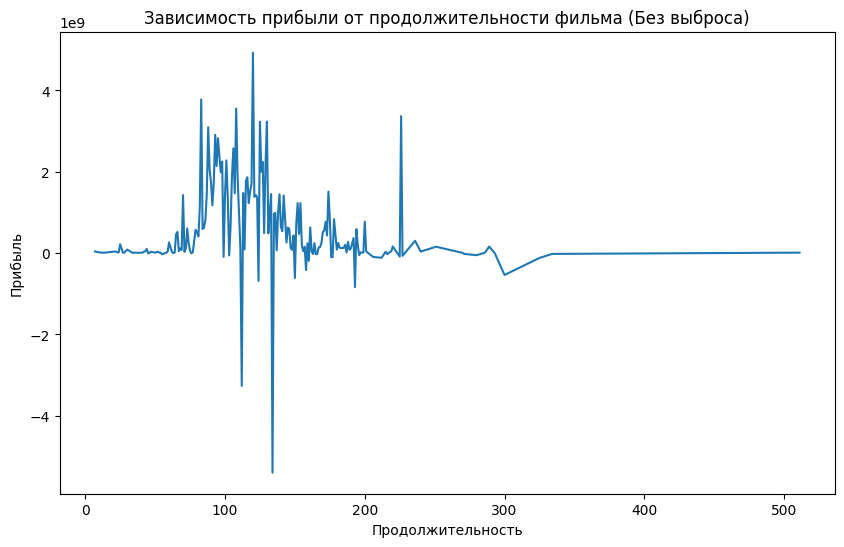

In [ ]:
profit_time = data.groupby("duration").agg({"profit":'sum'}).reset_index()
profit_time = profit_time.drop(profit_time['profit'].idxmin())
plt.figure(figsize=(10, 6))
plt.plot(profit_time['duration'], profit_time['profit'])
plt.xlabel('Продолжительность')
plt.ylabel('Прибыль')
plt.title('Зависимость прибыли от продолжительности фильма (Без выброса)');

Анализируя окончательный график, я с уверенностью могу подтвердить успешность исходной гипотезы. Действительно, продолжительность фильма имеет прямую связь с его прибыльностью.

Фильмы, чья продолжительность находится в диапазоне от 60 до 200 минут, в большинстве случаев прибыльны. Есть, конечно, редкие провальные фильмы, но их количество незначительно.

Хочу подметить, что продолжительность фильма имеет некоторое значение, но это только один из многих факторов, влияющих на прибыльность фильмов.

## Гипотеза 2: Имеет ли самые прибыльные фильмы, снятые американскими кинорежиссерами, больше лайков на своих страницах в Facebook по сравнению с прибыльными фильмами, созданными режиссерами из других стран? (Имеется ввиду лайков на странице кинорежисера)


Проведем анализ, чтобы проверить, действительно ли американские кинорежиссеры, известные своим талантом в сфере киноиндустрии, имеют больше лайков на своих страницах в Facebook. Для этого мы отберем фильмы с самым высоким ROI и построим столбчатую диаграмму (barplot), чтобы сравнить количество лайков у режиссеров этих фильмов. Такой анализ позволит нам оценить влияние репутации и успеха в кинематографе на популярность в социальных медиа.

In [ ]:
max_profit_by_country = data.groupby('country')['roi'].max().reset_index()
result_data = pd.merge(data, max_profit_by_country, on=['country', 'roi'], how='inner')
hypothesis_2 = result_data[['country', 'director_Facebook_likes']]

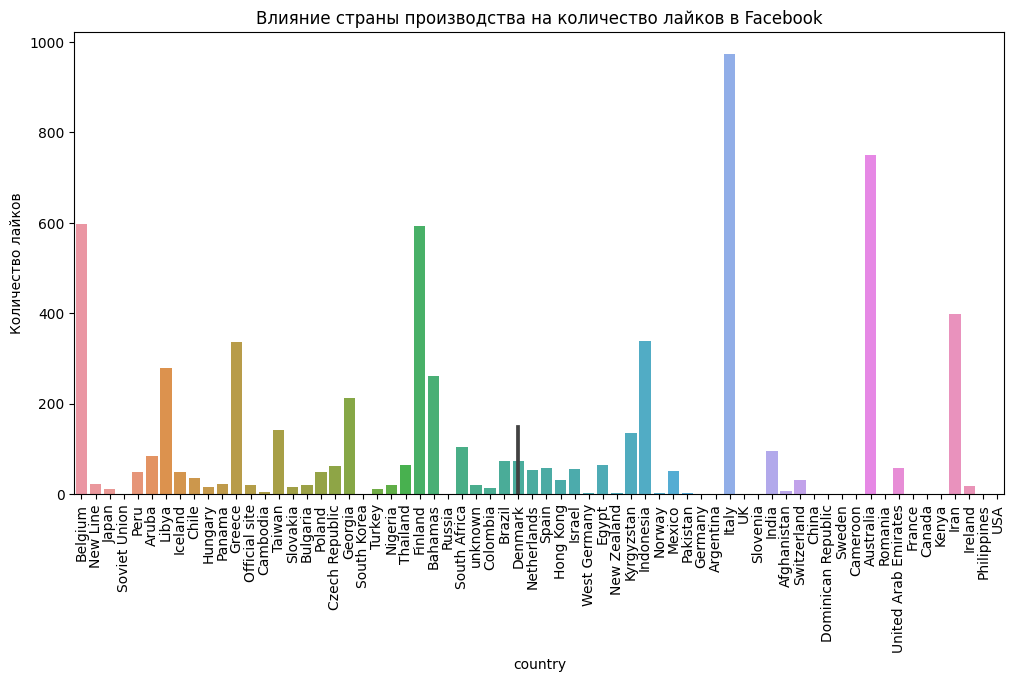

In [ ]:
plt.figure(figsize=(12,6));
sns.barplot(data=hypothesis_2, x="country", y="director_Facebook_likes");
plt.title("Влияние страны производства на количество лайков в Facebook")
plt.ylabel("Количество лайков")
plt.xticks(rotation=90);
plt.show()

Интересно, что фильм, приносящий самую большую прибыль в Америке, не имеет ни одного лайка на странице своего кинорежиссера. В то время как фаворитом по количеству лайков оказался режиссер, снявший фильм из Италии. Давайте рассмотрим, какие фильмы в Америке и Италии имеют высокий ROI, и попробуем определить, что делает их наиболее успешными с финансовой точки зрения.

In [ ]:
result_data[result_data["country"] == 'USA']

,color,Director_Name,num_Critic_for_reviews,duration,director_Facebook_likes,actor_3_Facebook_likes,actor_2_name,actor_1_Facebook_likes,gross,genres,...,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,real_domestic_gross,real_budget,profit,roi
67,Color,Benjamin Roberds,13,76,0,0,Maxwell Moody,0,25529689,"[Drama, Horror, Thriller]",...,1400,2013,0,6.3,2.35,16,2.630230e+07,1442.368334,2.630085e+07,1.823349e+06


О боже, лучше бы я не переходил по ссылке... После изучения [фильма](https://www.imdb.com/title/tt2107644/?ref_=fn_t), снятого в Америке, становится очевидо, что он обладает необычно низким бюджетом. Всего лишь $1442. Тем не менее, несмотря на ограниченные финансовые ресурсы, этот хоррорный фильм, выпущенный в 2013 году, достиг впечатляющей прибыли. На первый взгляд, можно предположить, что его создатели не являются опытными кинорежиссерами. Трейлер фильма также оставил желать лучшего впечатления. Можно предположить, что кинорежиссер и его команда попросту не имеют аккаунта на Facebook.

In [ ]:
result_data[result_data["country"] == 'Italy']

,color,Director_Name,num_Critic_for_reviews,duration,director_Facebook_likes,actor_3_Facebook_likes,actor_2_name,actor_1_Facebook_likes,gross,genres,...,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,real_domestic_gross,real_budget,profit,roi
48,Color,Bernardo Bertolucci,120,106,973,48,Stefania Sandrelli,319,25529689,[Drama],...,750000,1970,90,8.1,1.66,0,1.579202e+08,4.639311e+06,1.532809e+08,3203.958533


Удивительно, я впервые вижу рейтинг 100 на [Metacritic](https://www.imdb.com/title/tt0065571/criticreviews/?ref_=tt_ov_rt), что является исключительным достижением. Однако в данном случае рейтинг не случаен, а заслуженно присвоен [фильму](https://www.imdb.com/title/tt0065571/?ref_=fn_t), созданному Бернардо Бертолуччи. Его творческое мастерство и усердие действительно выделяют его в индустрии кино, и его победа над американским режиссером является полностью обоснованной и впечатляющей.

---
После тщательного анализа, я прихожу к выводу, что вторая гипотеза не находит подтверждения. Несмотря на первоначальные предположения, результаты исследования не подтверждают, что американские кинорежиссеры имеют значительно больше лайков на своих страницах в Facebook по сравнению с режиссерами из других стран.

## Гипотеза 3: Самые успешные фильмы американских режиссеров, измеряемые по рейтингу IMDb, часто являются самыми прибыльными по сравнению с успешными фильмами, созданными режиссерами из других стран. Так ли это?


Для сравнения возьмем самый прибыльный и высоко оцениваемый фильм из каждой страны.

In [ ]:
data['country'].unique()

array(['USA', 'UK', 'unknown', 'New Zealand', 'Canada', 'Australia',
       'Belgium', 'Japan', 'Germany', 'China', 'France', 'New Line',
       'Mexico', 'Spain', 'Hong Kong', 'Czech Republic', 'India',
       'Soviet Union', 'South Korea', 'Peru', 'Italy', 'Russia', 'Aruba',
       'Denmark', 'Libya', 'Ireland', 'South Africa', 'Iceland',
       'Switzerland', 'Romania', 'West Germany', 'Chile', 'Netherlands',
       'Hungary', 'Panama', 'Greece', 'Sweden', 'Norway', 'Official site',
       'Cambodia', 'Taiwan', 'Thailand', 'Slovakia', 'Bulgaria', 'Iran',
       'Poland', 'Georgia', 'Turkey', 'Nigeria', 'Brazil', 'Finland',
       'Bahamas', 'Argentina', 'Colombia', 'Israel', 'Egypt',
       'Kyrgyzstan', 'Indonesia', 'Pakistan', 'Slovenia', 'Afghanistan',
       'Dominican Republic', 'Cameroon', 'United Arab Emirates', 'Kenya',
       'Philippines'], dtype=object)

In [ ]:
top_countries = (
    data[(data['country'] != 'unknown') & (data['Director_Name'] != 'unknown')]
    .groupby(['country', 'Director_Name'])
    .agg({"imdb_score": "max", "profit": "max"})
    .reset_index()
    .sort_values(by=['country', 'imdb_score'], ascending=[True, False])
    .groupby('country')
    .first()
    .reset_index()
)

# hip_3 = data[(data['country'] != 'unknown') & (data['Director_Name'] != 'unknown')]
# max_scores = hip_3.groupby('country')['imdb_score'].transform(max)
# max_profits = hip_3.groupby('country')['profit'].transform(max)
# result = hip_3[(hip_3['imdb_score'] == max_scores) & (hip_3['profit'] == max_profits)]
# result = result.loc[:,['Director_Name', 'country', 'imdb_score', 'profit']].sort_values(by="imdb_score", ascending=False)

In [ ]:
top_countries.head()

,country,Director_Name,imdb_score,profit
0,Afghanistan,Siddiq Barmak,7.4,1.410473e+06
1,Argentina,Juan José Campanella,8.2,2.032427e+07
2,Aruba,Hark Tsui,4.8,-3.669878e+07
3,Australia,George Miller,8.1,8.373695e+07
4,Bahamas,Paul Schrader,4.4,2.081335e+07


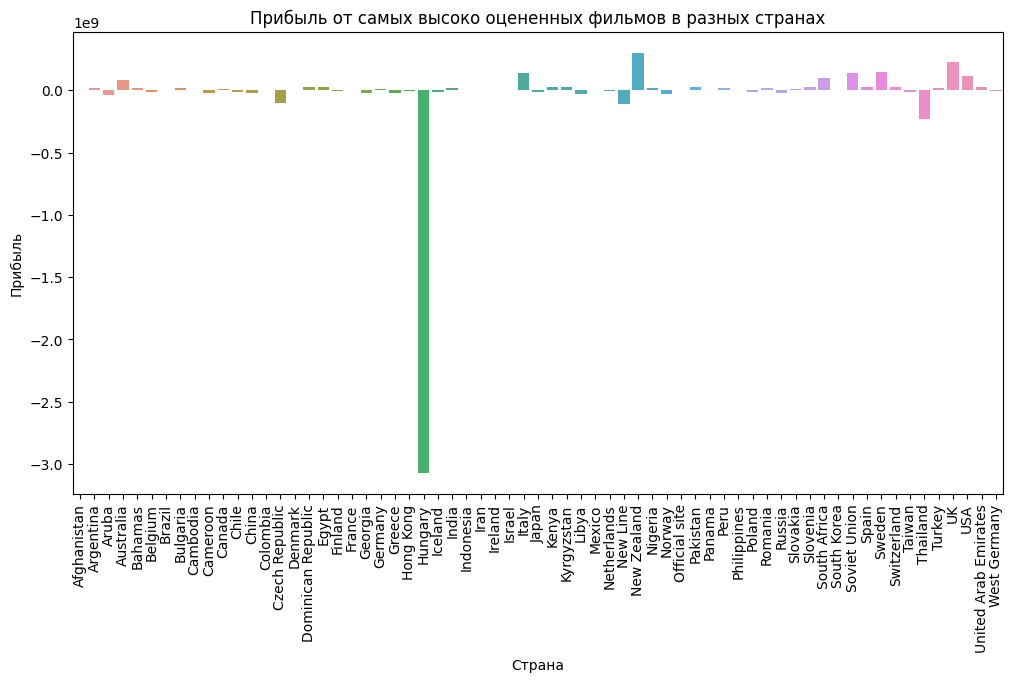

In [ ]:
plt.figure(figsize=(12,6));
sns.barplot(data=top_countries, x='country', y='profit')
plt.xlabel("Страна")
plt.ylabel("Прибыль")
plt.title("Прибыль от самых высоко оцененных фильмов в разных странах")
plt.xticks(rotation=90);

Мы имеем дело с выбросом. Исключим из нашего DataFrame это значение, чтобы дать объективный анализ.

In [ ]:
top_countries['profit'].idxmin() # индекс того самого значения

24

In [ ]:
top_countries = top_countries.drop(top_countries['profit'].idxmin(), axis=0)

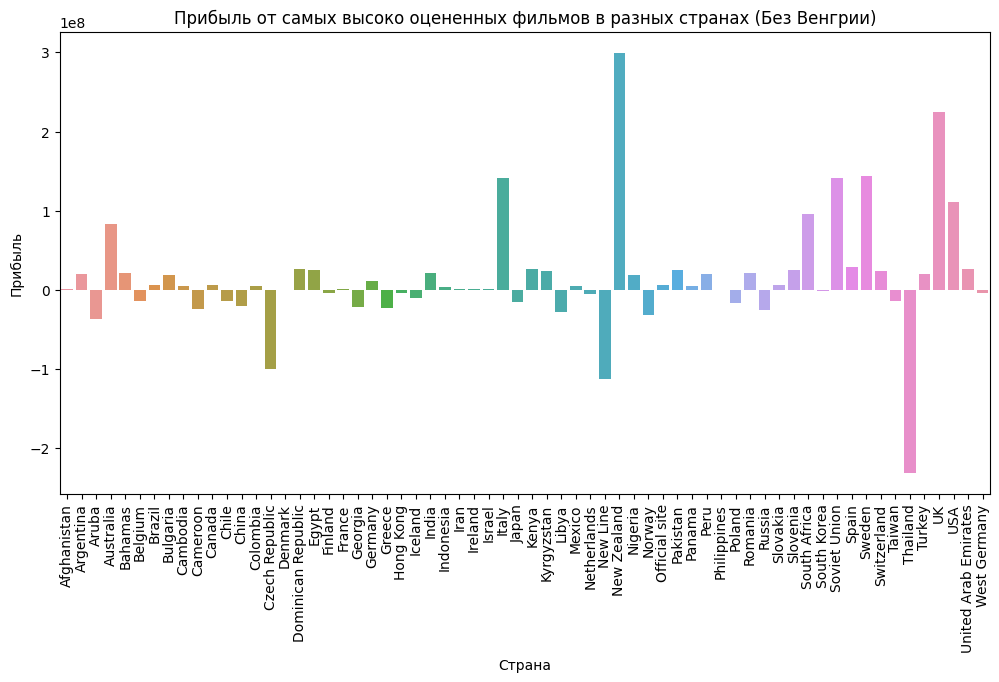

In [ ]:
plt.figure(figsize=(12,6));
sns.barplot(data=top_countries, x='country', y='profit')
plt.xlabel("Страна")
plt.ylabel("Прибыль")
plt.title("Прибыль от самых высоко оцененных фильмов в разных странах (Без Венгрии)")
plt.xticks(rotation=90);

Наша гипотеза не подтверждается, так как самый высоко оцениваемый и прибыльный американский фильм на графике ниже, чем фильмы таких стран, как Великобритания, Испания и другие. При этом самым прибыльным фильмом оказалась картина из Новой Зеландии. Давайте посмотрим на нее.

### Дополнительны анализ

In [ ]:
top_countries['profit'].idxmax()

39

In [ ]:
data[(data['country'] == 'New Zealand') & (data['imdb_score'] == 8.8) ]

,color,Director_Name,num_Critic_for_reviews,duration,director_Facebook_likes,actor_3_Facebook_likes,actor_2_name,actor_1_Facebook_likes,gross,genres,...,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,real_domestic_gross,real_budget,profit,roi
267,Color,Peter Jackson,297,171,0,857,Orlando Bloom,16000,313837577,"[Action, Adventure, Drama, Fantasy]",...,93000000,2001,5000,8.8,2.35,21000,4.253146e+08,1.260342e+08,2.992804e+08,137.45976


Кинокартина, получившая высокую оценку критиков — 8,8 баллов на IMDb и ROI коэффициент, равный 137, является свидетельством её успеха.

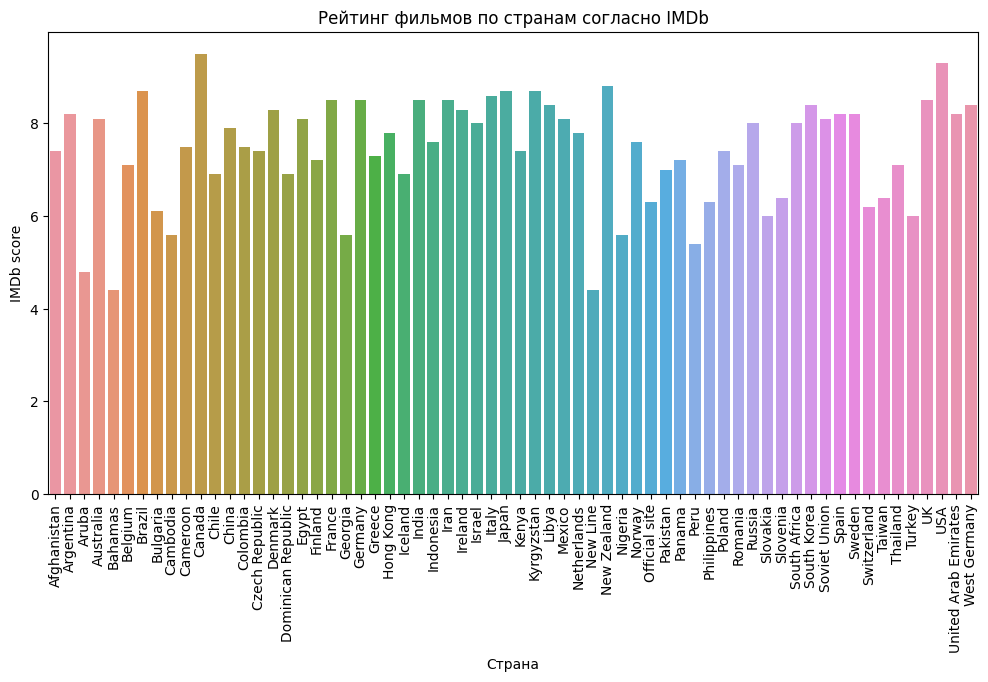

In [ ]:
plt.figure(figsize=(12,6));
sns.barplot(data=top_countries, x='country', y='imdb_score')
plt.xlabel("Страна")
plt.ylabel("IMDb score")
plt.title("Рейтинг фильмов по странам согласно IMDb")
plt.xticks(rotation=90);

Кинопроизведение, созданное в Канаде, имеет более высокий рейтинг на IMDb, чем фильм из США. Давайте изучим фильм подробнее.

In [ ]:
data[data['imdb_score'] == data['imdb_score'].max()]

,color,Director_Name,num_Critic_for_reviews,duration,director_Facebook_likes,actor_3_Facebook_likes,actor_2_name,actor_1_Facebook_likes,gross,genres,...,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,real_domestic_gross,real_budget,profit,roi
2745,Color,John Blanchard,110,65,0,176,Andrea Martin,770,25529689,[Comedy],...,20000000,2005,179,9.5,1.33,0,3.137380e+07,2.457829e+07,6.795515e+06,-72.351555


Можно заметить, что при высокой оценке IMDb фильм имеет малую успешность.  Подчеркну - это САМЫЙ выосоко оценный фильм, снятый в Канаде. Если сравнить его с фильмом из США, у которого рейтинг ниже на несколько десятых, то видно, что Соединенные Штаты заработали на фильме в несколько раз больше. Это наглядно иллюстрируется приведенным графиком.

На этом этапе завершается мой анализ данной выборки данных.

## Экспорт данных

In [ ]:
cpi_table.tail().to_csv("Lab1 Leshchev FIT-221 cpi_table.csv", index=False)
data.to_csv("Lab1 Leshchev FIT-221 movie_processed.csv", index=False)